# Shifted Griewank's Function with PSO

### dimension = 50

In [1]:
import numpy as np
import random
import math as mt

from matplotlib import pyplot as plt
import time

start_time = time.time() # To evaluate computational time


In [2]:
class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0, num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])
            
    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i        
            
    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.4       # constant inertia weight (how much to weigh the previous velocity)
        c1=1.5      # cognative constant
        c2=3        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social
            
    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0, num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]       



In [3]:
def PSO(costFunc,x0,bounds,num_particles,maxiter):
    global num_dim  

    
    num_dim = len(x0)
    err_all = np.empty((0,1))
    err_best_g = -1                   # best error for group
    pos_best_g = []                   # best position for group

    # establish the swarm
    swarm=[]
    for i in range(0,num_particles):
        swarm.append(Particle(x0))

    # begin optimization loop
    i=0
    while i < maxiter:
        #print i,err_best_g
        # cycle through particles in swarm and evaluate fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunc)
           
            
            # determine if current particle is the best (globally)
            if swarm[j].err_i < err_best_g or err_best_g == -1:
                pos_best_g = list(swarm[j].position_i)
                err_best_g = float(swarm[j].err_i)

        # cycle through swarm and update velocities and position
        for j in range(0,num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)
        
        
        err_all = np.vstack((err_all,err_best_g)) 
        i+=1        
          
    return  err_all, pos_best_g, err_best_g 
   
    


In [4]:
def PSO(costFunc,x0,bounds,num_particles,maxiter):
    global num_dimensions    

    
    num_dimensions = len(x0)
    err_all = np.empty((0,1))
    err_best_g = -1                   # best error for group
    pos_best_g = []                   # best position for group

    # establish the swarm
    swarm=[]
    for i in range(0,num_particles):
        swarm.append(Particle(x0))

    # begin optimization loop
    i=0
    while i < maxiter:
        #print i,err_best_g
        # cycle through particles in swarm and evaluate fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunc)
           
            
            # determine if current particle is the best (globally)
            if swarm[j].err_i < err_best_g or err_best_g == -1:
                pos_best_g = list(swarm[j].position_i)
                err_best_g = float(swarm[j].err_i)

        # cycle through swarm and update velocities and position
        for j in range(0,num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)
        
        
        err_all = np.vstack((err_all,err_best_g)) 
        i+=1        
          
    return  err_all, pos_best_g, err_best_g 
   
    


In [5]:
Dimensions=50
f_bias = -180
lower_bound = -100
upper_bound =  100

In [6]:
shift_Griewank=[
    540.15514217661052000000   ,   -322.63378371085463000000   ,   128.21110025014389000000    ,   -16.82103754884030900000    ,   469.55875937868200000000    ,   314.51619963287362000000    ,   -52.23880179799039100000    ,   -577.79562810213076000000   ,   385.68859715430392000000    ,   -66.35596277616696200000    ,   138.51881772011370000000    ,   350.32444491244246000000    ,   506.17556489376307000000    ,   285.84869497279840000000    ,   -388.48062660645837000000   ,   -113.15254432548545000000   ,   522.56363892912645000000    ,   500.28532789608926000000    ,   -107.67575161086558000000   ,   472.37943709624028000000    ,   -530.53043425887768000000   ,   -176.55824133959959000000   ,   375.79979676450932000000    ,   -588.16643920689171000000   ,   -433.33094165166017000000   ,   -356.68173772767221000000   ,   -361.53390880621242000000   ,   124.55097503258310000000    ,   -273.37449003604758000000   ,   -361.42287868672543000000   ,   -581.67128756515649000000   ,   296.14281187731513000000    ,   -65.88428125446387200000    ,   518.17749415399771000000    ,   -40.80678998949122200000    ,   -97.62063872699252400000    ,   415.46570138918935000000    ,   30.18299556620684100000 ,   -356.82317081953522000000   ,   206.56496216914616000000    ,   405.74213406286412000000    ,   -576.43258336221902000000   ,   217.53259353856242000000    ,   -144.62277836640231000000   ,   398.15522113152781000000    ,   3.37546079550111240000  ,   251.36567124406417000000    ,   -85.32916159080389200000    ,   -234.45915975672682000000   ,   -372.41550294339004000000   ,   -367.88261231374190000000   ,   218.66786830966021000000    ,   -236.68271906806922000000   ,   50.00862467770514300000 ,   -418.95242862028243000000   ,   237.47817823183607000000    ,   -145.95239938479472000000   ,   432.01392586418342000000    ,   424.38615679532109000000    ,   112.27549504761794000000    ,   -4.13706035627660640000 ,   479.72301020353189000000    ,   385.95499288241126000000    ,   173.89246103261326000000    ,   381.56920900709417000000    ,   192.27306772992279000000    ,   -189.63525807574109000000   ,   -252.32892497251424000000   ,   -190.56771670213982000000   ,   40.89482115192061000000 ,   272.53586031561224000000    ,   -228.85180825085070000000   ,   406.19525392569665000000    ,   81.68695320933090900000 ,   -155.50373204146018000000   ,   243.28789588845223000000    ,   55.88538219492750200000 ,   -66.14375439250534300000    ,   233.48068851065705000000    ,   145.57215695449611000000    ,   353.78529624111172000000    ,   548.21213813385248000000    ,   27.10841889684934400000 ,   456.17064889359267000000    ,   -392.45263046971610000000   ,   575.69627614660908000000    ,   -274.26328962984019000000   ,   -297.20478375121161000000   ,   450.89027978168929000000    ,   284.76718615830691000000    ,   -436.17750928834835000000   ,   -585.89197517625848000000   ,   472.67755973430394000000    ,   -361.03431935311403000000   ,   -241.53238547734264000000   ,   193.73109165878998000000    ,   -258.70969230006648000000   ,   -36.93085774679866500000    ,   -522.26265244407296000000   ,   586.00192593315683000000    ,
    99.35001787347698600000     ,   -91.80449177873913400000    ,   18.61410256891542800000     ,   -199.25822403388969000000   ,   -80.51208467192509500000    ,   -328.86015822666417000000   ,   95.76824789951876900000 ,   312.43801176521288000000    ,   35.78774005927925800000 ,   168.63179878780227000000    ,   -349.11671467389601000000   ,   -144.21795557905062000000   ,   339.99437984125518000000    ,   217.01490167667566000000    ,   -46.68584801196129800000    ,   81.39445491460105600000 ,   353.05278164713764000000    ,   -528.98088783471462000000   ,   123.44290280039081000000    ,   -539.67743550375246000000   ,   -101.55016746813277000000   ,   -234.00158759580978000000   ,   449.24060590515137000000    ,   -581.98860158806053000000   ,   321.54046801336972000000    ,   565.01392710674804000000    ,   588.09911113567523000000    ,   346.63403068050309000000    ,   -73.60975947490555900000    ,   -2.02643586182341550000 ,   -343.24400208460048000000   ,   172.19074546241995000000    ,   -215.95730704020372000000   ,   552.11832044281255000000    ,   271.95811997027761000000    ,   -105.65615019762629000000   ,   293.47893972738643000000    ,   -278.46329914875088000000   ,   -72.09082852159008300000    ,   520.05612982750768000000    ,   219.99878920618164000000    ,   -344.92816279351609000000   ,   407.08588840343430000000    ,   154.54152002888850000000    ,   -439.47270183188840000000   ,   -351.44072443037396000000   ,   128.63873344743649000000    ,   155.86541861076967000000    ,   -155.42780873772443000000   ,   90.17733485696214800000 ,   -58.29020788502793900000    ,   -547.32560958342719000000   ,   -567.37785240399046000000   ,   -224.77794230382563000000   ,   -584.56491039240302000000   ,   -139.23925380683795000000   ,   219.73916136551975000000    ,   -488.58904591089623000000   ,   -557.59401123701332000000   ,   134.87457764762701000000    ,   130.24843346878993000000    ,   -581.08821849629919000000   ,   -580.37407974000416000000   ,   -371.91049310432913000000   ,   104.30216626160802000000    ,   -530.90269214605371000000   ,   -158.91835340838696000000   ,   157.74139769333181000000    ,   261.16130575883676000000    ,   231.20327366134529000000    ,   -499.10512709946647000000   ,   -54.77382029333705300000    ,   -69.80604371238928300000    ,   -176.09945399917132000000   ,   -415.67236497180988000000   ,   210.77357956009462000000    ,   239.05599328951496000000    ,   273.01095506151682000000    ,   -25.93874285201127300000    ,   65.81038361001230900000 ,   -454.74346435630287000000   ,   -59.09527082473607600000    ,   259.05953780756943000000    ,   471.40992977490373000000    ,   -272.27703572982915000000   ,   -294.27684532526007000000   ,   438.72417329370228000000    ,   -321.17955524696106000000   ,   365.84609293884728000000    ,   490.07705213822192000000    ,   -321.72681826520983000000   ,   -312.82492263721787000000   ,   -540.29461911450028000000   ,   -505.93911027594595000000   ,   168.97849184402060000000    ,   -370.93611552292771000000   ,   412.64339864923022000000    ,   -391.31970184585890000000   ,   -395.04862350998428000000   ,   593.15458861670368000000    ,
    -72.25097166434397900000    ,   -191.94246137317145000000   ,   -222.93922734716551000000   ,   -161.90593568559638000000   ,   -128.11253855225095000000   ,   109.83024449573497000000    ,   -456.30405965782984000000   ,   -554.24544387915455000000   ,   -49.68245440205191700000    ,   443.84082048840992000000    ,   521.08382270114771000000    ,   -282.66100062087105000000   ,   -407.63959296338339000000   ,   447.42630842355538000000    ,   -314.54363071732064000000   ,   174.99749996998651000000    ,   560.26490509071709000000    ,   197.91745431041295000000    ,   444.45723108717289000000    ,   -588.08723428398298000000   ,   -435.58812995085577000000   ,   382.50699181713310000000    ,   -83.80074114372371200000    ,   468.38606852331327000000    ,   281.88985411913495000000    ,   224.78830992492169000000    ,   -184.66563871059094000000   ,   -400.75831346733736000000   ,   -413.26490841953540000000   ,   -370.66042629606989000000   ,   -93.05816893495313000000    ,   427.17084873689714000000    ,   -11.70001558075728100000    ,   379.12172276020328000000    ,   -47.07620230381940000000    ,   -51.17474370300021700000    ,   -59.17334204073483800000    ,   -105.33712677595435000000   ,   481.93178971829366000000    ,   -593.29927296295443000000   ,   -243.11318524888873000000   ,   -541.00501308469711000000   ,   231.81654390730193000000    ,   180.12769189496544000000    ,   579.58533845571219000000    ,   63.20789213235002500000 ,   -119.91178099137107000000   ,   -361.45377626659672000000   ,   150.24122744078647000000    ,   280.03536226972142000000    ,   -148.93742198023580000000   ,   -588.14824452145706000000   ,   -96.17063242773724600000    ,   304.40355097630470000000    ,   352.64612967878236000000    ,   503.94864803504584000000    ,   413.66580228980968000000    ,   -158.69654103805863000000   ,   144.96159818537262000000    ,   277.53271735961368000000    ,   -367.32818401839813000000   ,   485.77480099962827000000    ,   83.04689960609653100000 ,   158.14791506610720000000    ,   -318.70445351009533000000   ,   58.53855064630579400000 ,   517.90002309562874000000    ,   -197.76308375232645000000   ,   186.63726601441738000000    ,   -129.71495173319596000000   ,   152.77774570079600000000    ,   238.89616529440502000000    ,   -123.37925544886252000000   ,   -103.64532559418365000000   ,   186.25553562680466000000    ,   405.10211859822846000000    ,   -154.07036130880556000000   ,   -89.69620982081841000000    ,   113.59604574308139000000    ,   78.88628650285750200000 ,   259.85087670005919000000    ,   13.57373780267710100000 ,   331.68145432019014000000    ,   -12.78542892180178100000    ,   -376.91465852973221000000   ,   240.76248617534065000000    ,   579.25056228751373000000    ,   367.96529914649113000000    ,   244.28118600431606000000    ,   -18.04353681051793500000    ,   -462.46461459523186000000   ,   197.82668056824718000000    ,   -161.55132997305446000000   ,   -431.94665215832254000000   ,   80.12736036372757600000 ,   387.60997714880011000000    ,   208.73835851443187000000    ,   599.33676593928158000000    ,   553.96368857828429000000    ,   -529.36540145329229000000   ,
    -167.62659489626390000000   ,   58.21537648152150300000     ,   -285.87651615384806000000   ,   116.81381752061247000000    ,   -540.86640408478286000000   ,   85.26899326159764300000 ,   241.02867988479738000000    ,   554.74591046059390000000    ,   300.62187833312009000000    ,   287.99165445416963000000    ,   -81.75193727163241400000    ,   161.11914757857062000000    ,   363.63160827831632000000    ,   -499.34279159875882000000   ,   534.55534549246499000000    ,   499.13095187294630000000    ,   122.38490836560425000000    ,   -295.72730552120248000000   ,   448.14096664847216000000    ,   16.08085199553204300000 ,   279.18077895527119000000    ,   -93.32809665672630200000    ,   553.64399862757159000000    ,   -513.52891373758939000000   ,   64.08956163646257700000 ,   -249.61929462907136000000   ,   429.55621570089033000000    ,   -197.09383357654849000000   ,   216.24462044460813000000    ,   -535.86669441781646000000   ,   -172.01335526688445000000   ,   -2.03448475736092860000 ,   -78.67135413564733400000    ,   74.95010052881684700000 ,   139.94535619855628000000    ,   -463.99202292173368000000   ,   477.90208873576148000000    ,   305.46165028638291000000    ,   349.34783485280104000000    ,   377.94248151987529000000    ,   204.00463787241870000000    ,   -358.94830524580516000000   ,   -272.29420614364108000000   ,   151.48156638060823000000    ,   44.22203378100744000000 ,   -528.59513889540040000000   ,   -493.24588862961025000000   ,   -274.43019074196019000000   ,   -109.11322107473597000000   ,   -31.15025955062469600000    ,   490.78721884237825000000    ,   115.49656572686899000000    ,   -205.25363740315214000000   ,   -26.16668912958493800000    ,   116.60493511241350000000    ,   -406.26149412005930000000   ,   395.36910104863182000000    ,   547.34688762585256000000    ,   114.65759424243595000000    ,   -565.50214414621234000000   ,   374.54138263161622000000    ,   132.13629139111208000000    ,   241.79112103509271000000    ,   -489.36455673639273000000   ,   -90.13303042957596700000    ,   -149.30800985310486000000   ,   -400.61510281824178000000   ,   399.78175134316393000000    ,   406.36764559076153000000    ,   -58.06316490472431700000    ,   547.92165808784603000000    ,   -423.41611625234049000000   ,   443.91951584168032000000    ,   323.32368018621196000000    ,   -67.00606115523407900000    ,   144.74414519143249000000    ,   542.02713695700095000000    ,   168.01158665586229000000    ,   -303.20684511680605000000   ,   -176.75760629625989000000   ,   -374.56742340268477000000   ,   -11.22677026135875200000    ,   -108.87080501459144000000   ,   -43.76929946831762700000    ,   133.13225984699147000000    ,   -514.59784095413397000000   ,   -222.86365302967647000000   ,   130.06038623728409000000    ,   -389.97578165955883000000   ,   145.23292025951196000000    ,   -304.84807947987736000000   ,   104.82985818707061000000    ,   7.26414459032275770000  ,   -42.26529141856406100000    ,   49.70271634743710400000 ,   530.79188339513030000000    ,   -189.88909191550709000000   ,   -117.83478891237161000000   ,   -230.77447744976251000000   ,   -106.11844880086699000000   ,
    -256.87292112336178000000   ,   -127.04686657699762000000   ,   3.61738261461493950000      ,   266.37581560916556000000    ,   -232.54974545161758000000   ,   -465.40354573060199000000   ,   -68.05204806644519500000    ,   -39.88493739557941400000    ,   -582.39734966478045000000   ,   196.86223922954537000000    ,   268.87405045183561000000    ,   -262.03967638505389000000   ,   -285.81758627314258000000   ,   250.16568583852893000000    ,   340.63082736586239000000    ,   583.38936787437729000000    ,   -31.98875351864126100000    ,   483.38260112295097000000    ,   -58.72948655367486000000    ,   365.42017036752475000000    ,   394.63737151310761000000    ,   -400.47585996315183000000   ,   -127.31279361642521000000   ,   24.90898124888656200000 ,   261.74876673644030000000    ,   83.02742252091184100000 ,   -47.03259200881666400000    ,   -65.63153591181264800000    ,   -494.70647265121204000000   ,   -67.82014171988737400000    ,   -160.44018480641171000000   ,   -236.95941777150301000000   ,   422.21363679881313000000    ,   311.37526545595097000000    ,   539.71114155494593000000    ,   69.52621085598070700000 ,   -582.92038089204027000000   ,   115.41250138993905000000    ,   379.44685099435617000000    ,   572.51082580981461000000    ,   -333.71030455136588000000   ,   244.42040088690442000000    ,   26.47309836308829700000 ,   519.47646798205733000000    ,   256.02533221422004000000    ,   -326.35331648652158000000   ,   -60.42947439684053300000    ,   -393.36036542038664000000   ,   562.58417188290014000000    ,   -173.14067465155529000000   ,   -541.14380624438945000000   ,   306.40628615008973000000    ,   473.77531617204636000000    ,   -256.62041945414887000000   ,   -298.55934446078464000000   ,   519.28342962922761000000    ,   -442.82103705162348000000   ,   528.98345075257976000000    ,   242.22380828457437000000    ,   417.21176181535475000000    ,   -348.87403120506667000000   ,   -53.88997107275736200000    ,   -502.71152970856406000000   ,   421.34688110862635000000    ,   74.45841182866672600000 ,   -216.84444432571973000000   ,   -150.12088626287982000000   ,   441.35483749394621000000    ,   -153.38851185696484000000   ,   -511.57193319023060000000   ,   -360.19440515023166000000   ,   -540.60806440357692000000   ,   80.05173494845075800000 ,   -453.69030018548671000000   ,   26.53411627458763200000 ,   -459.52781720040377000000   ,   323.90217310039736000000    ,   -149.93304400836712000000   ,   388.06464438032026000000    ,   -544.03662537220794000000   ,   117.49591392614707000000    ,   538.98047338852439000000    ,   -253.44281667736175000000   ,   466.59913235973590000000    ,   -478.09742626469739000000   ,   -521.62259197141884000000   ,   -318.84032003141897000000   ,   519.71810213811955000000    ,   -524.24652485741422000000   ,   -282.93880352741900000000   ,   599.43800911949756000000    ,   -345.61444498161632000000   ,   -1.90824172388772690000 ,   -251.41404572645456000000   ,   207.30529311001590000000    ,   549.58934388623561000000    ,   319.86184132259234000000    ,   199.34848528644204000000    ,   -442.86621348119377000000   ,   -485.50438022816098000000   ,
    -582.16279504377769000000   ,   -254.16798529310063000000   ,   380.07745612404676000000    ,   582.58021182139851000000    ,   -579.16476835471417000000   ,   383.27151881060081000000    ,   145.36644694586164000000    ,   72.26644915551264600000 ,   -307.16215919697100000000   ,   386.40910618447379000000    ,   -284.14568645125308000000   ,   304.36144126280692000000    ,   191.57375856832277000000    ,   -343.12457297890376000000   ,   122.54028995008116000000    ,   125.92453206355515000000    ,   191.40185779828732000000    ,   -379.96364099471953000000   ,   163.85628639387107000000    ,   -395.62906784326958000000   ,   47.52132704757980300000 ,   148.07301905309566000000    ,   223.06796788891154000000    ,   212.81514324569525000000    ,   452.19602903232089000000    ,   -584.53139973080238000000   ,   -227.51732871909928000000   ,   334.89509698412508000000    ,   -231.24469809397829000000   ,   512.01397276597527000000    ,   214.46385102531633000000    ,   -510.81420853859049000000   ,   -515.19697037895367000000   ,   -585.68343997774798000000   ,   -327.41554193838800000000   ,   19.50239630361875200000 ,   -50.15494160472223900000    ,   243.84400590478049000000    ,   98.98065001943405200000 ,   11.04720217747194500000 ,   -510.85246908710207000000   ,   -368.11642365128313000000   ,   -144.47503999844508000000   ,   -268.27833539724276000000   ,   325.05820348025236000000    ,   -223.28401199631736000000   ,   165.83186293049721000000    ,   583.88023692109368000000    ,   3.45096430085391150000  ,   537.24405216256832000000    ,   393.63101016710516000000    ,   501.06864386286861000000    ,   -464.30420504886689000000   ,   374.55108727085690000000    ,   489.91507572809473000000    ,   -412.34865672909268000000   ,   -453.45747999198466000000   ,   315.19976371531959000000    ,   266.16034142011006000000    ,   181.96777990647604000000    ,   304.82719902458018000000    ,   195.79440941652717000000    ,   460.19220227132860000000    ,   -273.41107633904733000000   ,   -96.68074132542710700000    ,   -344.40760932901310000000   ,   -557.28003953764869000000   ,   -502.60355509105818000000   ,   420.68013989446274000000    ,   -191.75586324872728000000   ,   -40.61402613585687500000    ,   496.51588768437296000000    ,   -325.70795297743712000000   ,   434.45388017980918000000    ,   187.94224281105744000000    ,   469.41936293508275000000    ,   -14.22777811205594400000    ,   591.17477601660994000000    ,   -152.00887134679846000000   ,   37.65398140926333800000 ,   -382.42040535516554000000   ,   2.33320222296424620000  ,   -93.36620712000257100000    ,   192.51287942852434000000    ,   208.38361337368679000000    ,   548.79621948391832000000    ,   -369.76110515341230000000   ,   -466.54027412744790000000   ,   78.06464502567064300000 ,   562.99952693103342000000    ,   -571.50735494483934000000   ,   444.25898645306142000000    ,   -567.74808866856586000000   ,   23.43442604983943100000 ,   -369.25029518654196000000   ,   258.82685610902695000000    ,   -299.19266245418794000000   ,   520.63777896043507000000    ,   -435.37282495582235000000   ,   25.94680703578455900000 ,
    474.24202852206690000000    ,   530.86470525658024000000    ,   -197.89994554235437000000   ,   -75.16341158291072600000    ,   -34.61290895210197500000    ,   -420.82759738509162000000   ,   -436.96272698131872000000   ,   38.99787617173433300000 ,   270.94717131598247000000    ,   -121.55633842271345000000   ,   -169.89778077949637000000   ,   -257.66470539659196000000   ,   442.36229284196611000000    ,   151.69520956513156000000    ,   -310.59322977869914000000   ,   573.69798357719537000000    ,   168.60093605262352000000    ,   -324.18162309271025000000   ,   217.60218595599804000000    ,   198.98809020142869000000    ,   -438.33843141866214000000   ,   -573.00804790317466000000   ,   -285.36066076606670000000   ,   -460.18180846244377000000   ,   -516.81811452149316000000   ,   423.51659715678136000000    ,   -383.60319291452390000000   ,   -561.09772270379528000000   ,   280.71150834199887000000    ,   43.82018728601235600000 ,   -268.76440389651464000000   ,   -157.85021615772837000000   ,   -584.53643330368311000000   ,   467.04730134813212000000    ,   439.22472236755061000000    ,   -294.90367845159233000000   ,   83.37671604007562100000 ,   -408.88221832056303000000   ,   113.23729944807133000000    ,   -202.67990263250960000000   ,   190.33518478553549000000    ,   436.36106174848737000000    ,   81.14797663962338000000 ,   576.57752945501056000000    ,   350.19792280307252000000    ,   -416.88765355007598000000   ,   399.63267951761486000000    ,   -369.76408265587702000000   ,   166.78388145330439000000    ,   202.80009517217138000000    ,   326.50535993173264000000    ,   -144.21870044197732000000   ,   -70.09741758110692400000    ,   -20.32800768857680400000    ,   129.72678773598989000000    ,   -388.80523039615173000000   ,   -597.56932681889941000000   ,   348.26880261331030000000    ,   16.33020199336760900000 ,   -344.12474819016103000000   ,   -475.86024484278846000000   ,   -411.19600092250397000000   ,   -110.98202389289924000000   ,   -110.69157365200391000000   ,   -536.76877477443350000000   ,   530.17817982853057000000    ,   -420.03397901859324000000   ,   -138.75114460441029000000   ,   -226.72972908315506000000   ,   -397.75866830335258000000   ,   475.97777538528703000000    ,   -212.73068219355571000000   ,   280.79558017934596000000    ,   -106.91498109084648000000   ,   -120.24738521614370000000   ,   6.62664876615974660000  ,   -396.83296908686447000000   ,   29.69458829061159100000 ,   169.44319600033828000000    ,   -580.56301923071396000000   ,   404.22186697977475000000    ,   364.15462531278001000000    ,   237.34179624945091000000    ,   -45.73466209476384800000    ,   -500.86485852421413000000   ,   384.86041046586661000000    ,   -368.37597856852790000000   ,   -65.57432618643747400000    ,   -584.45060454419263000000   ,   -229.50984405272129000000   ,   450.42117968403863000000    ,   402.31127842988928000000    ,   -200.28591909499289000000   ,   456.84639820788698000000    ,   -24.37583317389737700000    ,   72.98007333051100400000 ,   139.09038660327838000000    ,   194.27881791223706000000    ,   139.95988197531005000000    ,   222.16800027103807000000    ,
    12.18363245157445400000     ,   256.75301344191053000000    ,   18.24947936767443900000     ,   127.03895299248359000000    ,   560.04315558455733000000    ,   386.54088211607052000000    ,   -218.69918467209158000000   ,   105.23612639524788000000    ,   -443.75799421292936000000   ,   -294.77489157597330000000   ,   363.63707791141371000000    ,   201.41507248621588000000    ,   -583.64837666458641000000   ,   73.89524365957345300000 ,   -54.52687434349434200000    ,   485.93906404672452000000    ,   -261.40937865737106000000   ,   -521.95877534056888000000   ,   -28.08973759292416600000    ,   580.45430183431449000000    ,   506.81949742016809000000    ,   73.43550577602786700000 ,   182.78963243007217000000    ,   327.21551663953960000000    ,   -472.58904779308034000000   ,   -598.71196131946647000000   ,   50.11654745341013500000 ,   -591.77064991080795000000   ,   -58.39479347479357300000    ,   -365.20553796704974000000   ,   344.57175466431272000000    ,   142.27514903275096000000    ,   -581.37485131762617000000   ,   469.02475790851258000000    ,   314.04382958602434000000    ,   488.44204908089409000000    ,   310.28231882745683000000    ,   -143.12407478712447000000   ,   -202.66705692187929000000   ,   4.89413239824170890000  ,   77.48231281919868300000 ,   320.63682836659564000000    ,   335.84133534555474000000    ,   -19.08253818394916800000    ,   362.65586985979996000000    ,   -34.78541563730379900000    ,   -356.68932521332073000000   ,   95.53787134969024900000 ,   199.80031139103392000000    ,   212.11834589880448000000    ,   531.01349199035189000000    ,   324.17824016772795000000    ,   284.88517855035445000000    ,   439.51472867452208000000    ,   589.13798437577361000000    ,   4.71311833331060370000  ,   154.90266117782437000000    ,   351.13238479653944000000    ,   -61.62095388973489200000    ,   29.22852908242452900000 ,   -394.23213431766476000000   ,   -443.20109804744698000000   ,   -337.46265117939117000000   ,   -473.42339679693305000000   ,   -430.28897729856249000000   ,   -51.63803863655448400000    ,   345.75965454857806000000    ,   -262.72322868934481000000   ,   -330.25592320349836000000   ,   490.64967936577500000000    ,   -591.20538581455651000000   ,   106.48720141200897000000    ,   50.54144436080889600000 ,   184.22877720330541000000    ,   -223.87802828694407000000   ,   -322.60941011011295000000   ,   -100.72340264433035000000   ,   -241.44145458280479000000   ,   206.92366892724556000000    ,   525.90897588985854000000    ,   -188.22276752660133000000   ,   75.55508644903227400000 ,   -457.33373077914547000000   ,   -397.17448702316983000000   ,   -265.32549901396959000000   ,   68.17758918280037500000 ,   -17.29300692046888300000    ,   542.66787181110999000000    ,   -321.69498846142710000000   ,   -25.60992807656759900000    ,   31.82688081675951300000 ,   351.26495238662949000000    ,   -368.39081762565695000000   ,   491.52053488280580000000    ,   506.63567126085945000000    ,   -584.08036137365605000000   ,   321.05956023815577000000    ,   536.81116610271715000000    ,   375.96662964531504000000    ,   508.59575261526675000000    ,
    -361.20328972476818000000   ,   209.12597052780950000000    ,   512.52370325887136000000    ,   -187.42008875299678000000   ,   113.39152546589162000000    ,   138.58440396027663000000    ,   -595.95111012948701000000   ,   578.41508195590018000000    ,   479.41571021241339000000    ,   231.30881715889416000000    ,   -72.41558811684331000000    ,   241.22749573673457000000    ,   131.65798669611831000000    ,   -240.13720624241478000000   ,   427.24463246493974000000    ,   -465.51339576521036000000   ,   -250.12750709414121000000   ,   -483.06392698004436000000   ,   -123.06243639734720000000   ,   -200.02481711307450000000   ,   533.08165667833941000000    ,   406.26654362296381000000    ,   -289.88711643736809000000   ,   -548.52224976458729000000   ,   -592.93825228321305000000   ,   89.30156088829096500000 ,   292.68234274243889000000    ,   368.19694058915945000000    ,   165.08477312028242000000    ,   -298.47442375896492000000   ,   -426.81545824259990000000   ,   181.86135900801673000000    ,   535.30431712401332000000    ,   379.06415522607892000000    ,   516.29647848061404000000    ,   -228.07036866181426000000   ,   -277.41946672942856000000   ,   43.74124203289466100000 ,   -404.06604495345277000000   ,   -346.81437343993611000000   ,   -339.82549163867924000000   ,   182.14779533065200000000    ,   -536.66857671834987000000   ,   -324.85166364392143000000   ,   200.91855425504104000000    ,   -226.87958766809152000000   ,   -232.04056542399331000000   ,   264.81586093756619000000    ,   545.28781202782966000000    ,   -442.63392840382045000000   ,   -518.06782911013113000000   ,   -449.72727761136952000000   ,   -400.61590187103297000000   ,   493.70095763316590000000    ,   -436.48767893273839000000   ,   140.39450509009464000000    ,   -277.22202444337569000000   ,   -335.20316085050723000000   ,   255.48122648434605000000    ,   58.79573073149003900000 ,   529.61810880430721000000    ,   -204.16226645210781000000   ,   245.38356224690801000000    ,   532.11055266997164000000    ,   97.91320493266675800000 ,   456.18502181567032000000    ,   299.53397348649719000000    ,   -144.45918927517022000000   ,   270.67353515738876000000    ,   -404.64215600446062000000   ,   547.44553506826878000000    ,   -364.52540337673321000000   ,   331.43100700285765000000    ,   135.95485885196501000000    ,   -405.26372273595211000000   ,   -562.73513587607795000000   ,   -253.64542169317940000000   ,   565.27713496647516000000    ,   540.59921029259772000000    ,   -326.34263069667168000000   ,   550.23130169199476000000    ,   215.82991128752838000000    ,   -534.03694990911811000000   ,   119.80958101630983000000    ,   -128.22480800373955000000   ,   -341.56057762225294000000   ,   -381.12045041694535000000   ,   -507.89517094643634000000   ,   -591.09156477133831000000   ,   346.53959553290554000000    ,   -578.65484385214131000000   ,   453.52975853321664000000    ,   -176.94987792819421000000   ,   266.56772144597892000000    ,   562.14100726894799000000    ,   -413.19841971138766000000   ,   -404.45334964178136000000   ,   -223.92315799665221000000   ,   -564.74214210451146000000   ,   -170.84985966100527000000   ,
    -567.37152206160715000000   ,   352.40042238117485000000    ,   599.07690535026745000000    ,   -467.71377054318651000000   ,   147.12139043473178000000    ,   -440.91378572196879000000   ,   -227.96425325942533000000   ,   -438.25477460529538000000   ,   -332.00842481614416000000   ,   -124.14385403349371000000   ,   -437.82780615360679000000   ,   -310.72957270368494000000   ,   513.01937977885905000000    ,   -130.67895121181385000000   ,   13.51532816077053700000 ,   -488.52466060604030000000   ,   -573.96130284247135000000   ,   -408.55820799107505000000   ,   413.41913259865896000000    ,   454.98417891118174000000    ,   -375.61256896559712000000   ,   589.56590284146819000000    ,   254.43580940001834000000    ,   445.63753991289877000000    ,   -24.44257828454829000000    ,   -4.79408813168970480000 ,   -254.96176295027271000000   ,   -526.87025886391802000000   ,   -285.03875494948335000000   ,   -376.48677954330560000000   ,   500.50774418799006000000    ,   -452.06556681794729000000   ,   -583.86554027939110000000   ,   -156.37113776290494000000   ,   238.36932998749967000000    ,   467.21665587900543000000    ,   112.52462296290844000000    ,   -411.97092392236107000000   ,   -219.97269757364506000000   ,   -319.92541700666760000000   ,   -589.89352350470426000000   ,   -123.71544975708383000000   ,   179.84175671100240000000    ,   -497.99927254244864000000   ,   322.57140391051075000000    ,   563.64204596603963000000    ,   257.75667825144603000000    ,   338.35421035259651000000    ,   -314.92190155173847000000   ,   -365.12308346006932000000   ,   -284.14330178926264000000   ,   256.54207751536671000000    ,   573.11968732277660000000    ,   164.54632901508160000000    ,   55.10898611882635100000 ,   417.66866930031892000000    ,   362.51719017613152000000    ,   201.96769208006140000000    ,   205.17916076381732000000    ,   384.77241874288711000000    ,   564.56684953092736000000    ,   -15.69000534971883100000    ,   380.96224265634396000000    ,   169.88540141520048000000    ,   -232.38076858332033000000   ,   193.11855868735802000000    ,   -170.37946393462965000000   ,   525.83931612145625000000    ,   -14.79963028216047900000    ,   -490.81157070724021000000   ,   208.60094023448823000000    ,   17.85638278539420300000 ,   -334.10478433726968000000   ,   270.01124514266553000000    ,   -518.10406683588803000000   ,   556.94912204704519000000    ,   -350.81209395760641000000   ,   -406.65812933834798000000   ,   165.86565911129765000000    ,   -599.72619253005837000000   ,   -197.24046797739567000000   ,   -269.88021424054682000000   ,   -546.56697552956371000000   ,   -487.32420288319304000000   ,   -108.00312027356705000000   ,   380.27078339274510000000    ,   444.62048617118330000000    ,   -572.93385545276533000000   ,   272.61238043751814000000    ,   417.61133767674755000000    ,   274.32022922162832000000    ,   546.11835993016189000000    ,   187.62133271622940000000    ,   290.76616021086875000000    ,   -186.04078331649509000000   ,   460.82633961018178000000    ,   -183.30709620094427000000   ,   -528.62798334897298000000   ,   262.09750929530412000000    ,   549.85715148888812000000
     ]

In [7]:
def Obj_func(x_array, shift = shift_Griewank , dimension = Dimensions, bias = f_bias):
    F1 = 0
    F2 = 1
    for i in range(0,dimension) :
        z  = x_array[i] - shift[i]
        F1 = (z**2)/4000
        F2 = mt.cos(z/((i+1)**.5))
        F1 += F1
        F2 *= F2
    return F1 - F2 + 1 + bias

In [8]:
# Parameter for PSO
initial= np.random.uniform(lower_bound, upper_bound, Dimensions)  # initial starting location
bounds = [(lower_bound, upper_bound,) for x in range(Dimensions)]
Obj_val = PSO(Obj_func,initial,bounds,num_particles=25,maxiter=50)

print ("The best fitness is: ", Obj_val[2])

The best fitness is:  -142.3540824608765


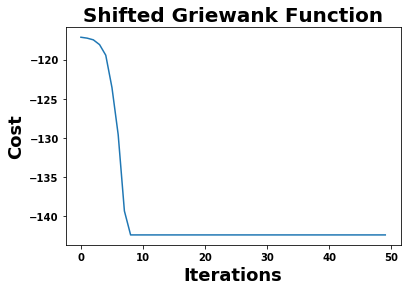

Computational time: 0.694 seconds


In [9]:
plt.plot(Obj_val[0])
plt.title("Shifted Griewank Function",fontsize=20,fontweight='bold')
plt.xlabel("Iterations",fontsize=18,fontweight='bold')
plt.ylabel("Cost",fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

print("Computational time: {:.3f} seconds".format(time.time()-start_time))